1. First, build a code for a perceptron(i.e. a single neuron and no hidden layers) and build a AND gate using it.
2. Now, try to build a XOR gate using a perceptron and share your results with us.
3. Implement a XOR gate again, this time you can use a single hidden layer.
4. Build a full adder using the perceptron you have built
5. Combine the adders into a ripple carry adder

IMPortant: Do not use scikit learn or keras or any other libraries. Implement the codes from scratch using numpy.
Implement seperate functions such as initialization, forward propagation, cost calculation and back propagation and then compile all of it in a class/function and test your neural net.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def sigmoid(x) :
        return 1/(1 + np.exp(-x))

def sigmoid_derivative(y):
        return sigmoid(y) * (1 - sigmoid(y))

def perceptron(x, w, b) :
    y = np.dot(w,x) + b
    a = sigmoid(y)
    return y, a

def cost_calculation(y_hat, y):
        m = len(y)
        cost = (1 / (2 * m)) * (np.sum((y_hat - y) ** 2))
        return cost

In [78]:
class NN_0(object):                    # No hidden layer
    def __init__(self, inputs, outputs) :
        inputs = np.array(inputs)
        outputs = np.array(outputs)
        z = inputs.shape
        self.weights = np.random.rand(1, z[1]) * 0.01
        self.bias = np.random.rand(1) * 0.01
        self.inputs = inputs
        self.outputs = outputs
        
    def forward_propagation(self, x):
        return perceptron(x, self.weights , self.bias)
    
    def back_propagation(self, epochs = 1000):
        num_samples = self.inputs.shape[0]
        costs = []

        for epoch in range(epochs):
            total_cost = 0
            for i in range(len(self.inputs)):
                x = self.inputs[i].reshape(-1, 1)  # Input as column vector
                y = self.outputs[i]                # The desired output

                z, y_hat = self.forward_propagation(x)

                cost = cost_calculation(y_hat, y)
                total_cost += cost

                # delL/delz (= dz) = delL/delb
                dJ_dz = (y_hat - y) * sigmoid_derivative(z)
                dJ_dw = dJ_dz * x.T
                dJ_db = dJ_dz

                alpha = 0.1

                self.weights -= alpha * dJ_dw
                self.bias -= alpha * dJ_db.item()

                # print(f"Weights: {self.weights}")
                # print(f"Bias: {self.bias}")

            avg_cost = total_cost/num_samples
            costs.append(avg_cost)

            # print(f"Epoch {epoch}: Cost = {avg_cost}") # To ensure cost is decreasing

        plt.plot(np.arange(epochs), costs)
        plt.ylabel("Cost")
        plt.xlabel("Epoch") # To ensure cost is decreasing graphically

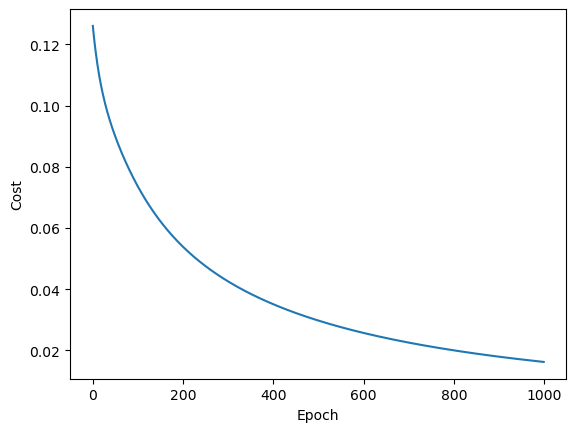

In [79]:
X = NN_0([[0, 0], [0, 1], [1, 0], [1, 1]], [[0], [0], [0], [1]]) # i.e. for AND gate
X.back_propagation()

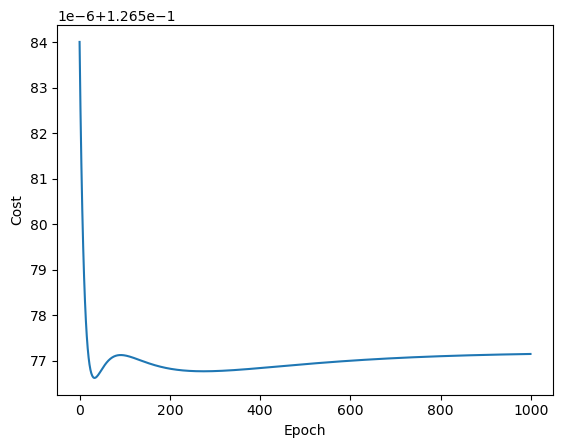

In [80]:
X = NN_0([[0, 0], [0, 1], [1, 0], [1, 1]], [[0], [1], [1], [0]]) # i.e. for XOR gate but no hidden layer
X.back_propagation()

 The cost did not converge to a solution that can solve the XOR problem.

In [83]:
class NN_1(object):                    # 1 hidden layer
    def __init__(self, inputs, hidden_layer_size, outputs) :
        inputs = np.array(inputs)
        outputs = np.array(outputs)
        input_size = inputs.shape[1]
        output_size = outputs.shape[1]

        self.weights1 = np.random.rand(hidden_layer_size, input_size) * 0.01
        self.bias1 = np.random.rand(hidden_layer_size, 1) * 0.01
        self.weights2 = np.random.rand(output_size, hidden_layer_size) * 0.01
        self.bias2 = np.random.rand(output_size, 1) * 0.01
        
        self.inputs = inputs
        self.outputs = outputs

    def forward_propagation(self, x):
        z1, a1 = perceptron(x, self.weights1, self.bias1)
        z2, a2 = perceptron(a1, self.weights2, self.bias2)
        return z1, a1, z2, a2
    

    def back_propagation(self, epochs = 1000) :
        num_samples = self.inputs.shape[0]
        costs = []
        
        for epoch in range(epochs):
            total_cost = 0

            for i in range(len(self.inputs)):
                x = self.inputs[i].reshape(-1, 1)  # Input as column vector
                y = self.outputs[i].reshape(-1, 1) # The desired output

                z1, a1, z2, y_hat = self.forward_propagation(x)

                total_cost += cost_calculation(y_hat, y)

                # dL/dz_2 (= dz_2) = dL/db_2
                dJ_dz_2 = (y_hat - y) * sigmoid_derivative(z2)
                dJ_dw_2 = np.dot(dJ_dz_2, a1.T)
                dJ_db_2 = dJ_dz_2

                dJ_dz_1 = np.dot(self.weights2.T, dJ_dz_2) * sigmoid_derivative(z1)
                dJ_dw_1 = np.dot(dJ_dz_1, x.T)
                dJ_db_1 = dJ_dz_1

                alpha = 0.1

                self.weights2 -= alpha * dJ_dw_2
                self.bias2 -= alpha * dJ_db_2
                self.weights1 -= alpha * dJ_dw_1
                self.bias1 -= alpha * dJ_db_1.reshape(self.bias1.shape)

            avg_cost = total_cost/num_samples
            costs.append(avg_cost)
            
            # print(f"Epoch {epoch}: Cost = {avg_cost}") # To ensure cost is decreasing
        
        plt.plot(np.arange(epochs), costs)
        plt.ylabel("Cost")
        plt.xlabel("Epoch") # To ensure cost is decreasing graphically

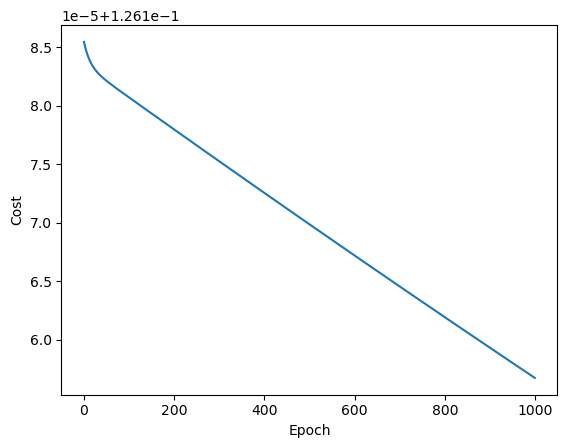

In [84]:
IL = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
OL = np.array([[0], [1], [1], [0]])
X = NN_1(IL, 2, OL)
X.back_propagation()